# Random Forest Notebook

In [24]:
from helpers import load_data
import numpy as np
from imblearn.ensemble import BalancedRandomForestClassifier # pip install imblearn - scikit wrapper
from sklearn import ensemble, pipeline, model_selection, metrics, preprocessing
import matplotlib.pyplot as plt
import pandas as pd

DATA_PATH = '../data/'
seed = 7

data = load_data(DATA_PATH)
X, y = data['muchlinski']

In [ ]:
cv_trees = [500,750,1000,1250,1500,1750,2000]
k_folds = 5
downsample_proportion=[1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128]

res = []

scoring=['precision','recall','f1','roc_auc']

for n_tree in cv_trees:
    for sample_prop in downsample_proportion:
        pipe = pipeline.make_pipeline(preprocessing.StandardScaler(), BalancedRandomForestClassifier(n_estimators=n_tree, sampling_strategy=sample_prop))
        scores = model_selection.cross_validate(pipe, X=X, y=y, cv=k_folds, scoring=scoring, return_train_score=False)
        cv_res = [n_tree, sample_prop, np.mean(scores['test_precision']), np.mean(scores['test_recall']), np.mean(scores['test_f1']), np.mean(scores['test_roc_auc'])] 
        res.append(cv_res)
        
res = pd.DataFrame(np.vstack(res), columns=['n_tree','sample_proportion','prec','rec','f1','roc_auc'])

In [28]:
display(res)

,n_tree,sample_proportion,prec,rec,f1,roc_auc
0,500.0,0.500000,0.118006,0.732971,0.200632,0.924749
1,500.0,0.250000,0.210059,0.543116,0.297931,0.926794
2,500.0,0.125000,0.338660,0.353623,0.336296,0.928202
3,500.0,0.062500,0.528214,0.215942,0.295660,0.924406
4,500.0,0.031250,0.653333,0.121014,0.202755,0.919517
5,500.0,0.015625,NaN,NaN,NaN,NaN
6,500.0,0.007812,NaN,NaN,NaN,NaN
7,750.0,0.500000,0.115805,0.724275,0.197588,0.926354
8,750.0,0.250000,0.199372,0.543116,0.288485,0.926979
9,750.0,0.125000,0.339654,0.362681,0.343302,0.926621


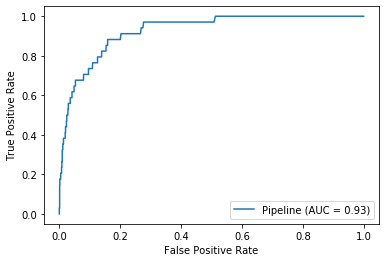

In [30]:
n_trees = 1000

# working auc roc for svm - can harmonize it with the rest of the notebook once i know how you guys want to approach this
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=seed)

pipe = pipeline.make_pipeline(preprocessing.StandardScaler(), BalancedRandomForestClassifier(n_estimators=1750, sampling_strategy=1/8))
pipe.fit(X_train, y_train)

metrics.plot_roc_curve(pipe, X_test, y_test)  
plt.show()                                   